# Feature Selection on House Prices Data

- L1 Regularization

In [14]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

%matplotlib inline

In [10]:
train_data = pd.read_pickle('data/final_train_data_feature_engineering_1hotenc_1.pkl')
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1430 entries, 0 to 1459
Columns: 372 entries, BsmtUnfSF to bin_mo_sold_(9, 12]
dtypes: float64(15), int64(3), uint8(354)
memory usage: 706.6 KB


In [6]:
train_data.head()

,BsmtUnfSF,2ndFlrSF,GarageArea,LotFrontage_log,LotArea_log,MasVnrArea_log,BsmtFinSF1_log,BsmtFinSF2_log,LowQualFinSF_log,WoodDeckSF_log,...,"bin_yr_remod_(1990, 2000]","bin_yr_remod_(2000, 2020]","bin_yr_sold_(2006, 2007]","bin_yr_sold_(2007, 2008]","bin_yr_sold_(2008, 2009]","bin_yr_sold_(2009, 2010]","bin_mo_sold_(1, 4]","bin_mo_sold_(4, 6]","bin_mo_sold_(6, 9]","bin_mo_sold_(9, 12]"
0,150,854,548,4.174387,9.041922,5.278115,6.559615,-9.21034,-9.21034,-9.210340,...,0,1,0,1,0,0,1,0,0,0
1,284,0,460,4.382027,9.169518,-9.210340,6.885510,-9.21034,-9.21034,5.697094,...,0,0,1,0,0,0,0,1,0,0
2,434,866,608,4.219508,9.328123,5.087597,6.186209,-9.21034,-9.21034,-9.210340,...,0,1,0,1,0,0,0,0,1,0
3,540,756,642,4.094345,9.164296,-9.210340,5.375279,-9.21034,-9.21034,-9.210340,...,0,0,0,0,0,0,1,0,0,0
4,490,1053,836,4.430817,9.565214,5.857933,6.484635,-9.21034,-9.21034,5.257496,...,1,0,0,1,0,0,0,0,0,1


In [7]:
train_data.describe()

,BsmtUnfSF,2ndFlrSF,GarageArea,LotFrontage_log,LotArea_log,MasVnrArea_log,BsmtFinSF1_log,BsmtFinSF2_log,LowQualFinSF_log,WoodDeckSF_log,...,"bin_yr_remod_(1990, 2000]","bin_yr_remod_(2000, 2020]","bin_yr_sold_(2006, 2007]","bin_yr_sold_(2007, 2008]","bin_yr_sold_(2008, 2009]","bin_yr_sold_(2009, 2010]","bin_mo_sold_(1, 4]","bin_mo_sold_(4, 6]","bin_mo_sold_(6, 9]","bin_mo_sold_(9, 12]"
count,1430.000000,1430.000000,1430.000000,1430.000000,1430.000000,1430.000000,1430.000000,1430.000000,1430.000000,1430.000000,...,1430.000000,1430.000000,1430.000000,1430.000000,1430.000000,1430.000000,1430.000000,1430.000000,1430.000000,1430.000000
mean,562.467832,337.886713,465.418881,4.191539,9.096707,-3.502683,1.214734,-7.487048,-8.951942,-2.438030,...,0.194406,0.331469,0.225175,0.209091,0.230769,0.120280,0.204196,0.316084,0.285315,0.156643
std,436.521654,425.296412,207.837892,0.313043,0.509193,7.064876,7.241633,4.781434,1.940012,7.166345,...,0.395881,0.470906,0.417844,0.406802,0.421472,0.325402,0.403254,0.465109,0.451722,0.363591
min,0.000000,0.000000,0.000000,3.044522,7.170120,-9.210340,-9.210340,-9.210340,-9.210340,-9.210340,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,219.250000,0.000000,322.500000,4.094345,8.922658,-9.210340,-9.210340,-9.210340,-9.210340,-9.210340,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,474.000000,0.000000,474.000000,4.234107,9.145802,-9.210340,5.929586,-9.210340,-9.210340,-9.210340,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,806.000000,723.750000,576.000000,4.356709,9.342486,5.030439,6.546786,-9.210340,-9.210340,5.123965,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,2336.000000,1818.000000,1390.000000,5.204007,12.279532,7.377759,7.723120,7.295735,6.269096,6.753438,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
X = train_data[train_data.columns.drop("SalePrice_log")]
y = train_data["SalePrice_log"]

X.shape, y.shape

((1430, 371), (1430,))

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [43]:
lasso = Lasso(alpha=0.02, random_state=0).fit(X_train, y_train)

In [44]:
model = SelectFromModel(lasso, prefit=True)

In [45]:
X_train_new = model.transform(X_train)
X_train_new.shape

(1144, 19)

In [46]:
selected_features = pd.DataFrame(model.inverse_transform(X_train_new), 
             index = X_train.index, 
             columns = X_train.columns)

In [47]:
selected_columns = selected_features.columns[selected_features.var()!=0]
selected_columns

Index(['BsmtUnfSF', '2ndFlrSF', 'GarageArea', 'LotArea_log', 'MasVnrArea_log',
       'BsmtFinSF1_log', 'WoodDeckSF_log', 'OpenPorchSF_log',
       'EnclosedPorch_log', '3SsnPorch_log', 'ScreenPorch_log', 'MiscVal_log',
       'total_sqft_house_log', 'Foundation_PConc', 'BsmtQual_TA',
       'HeatingQC_Ex', 'KitchenQual_TA', 'GarageType_Attchd',
       'has_fireplace_1'],
      dtype='object')

## Save

In [58]:
final_cols = selected_columns.tolist()
final_cols.append('SalePrice_log')

In [59]:
pd.to_pickle(train_data[final_cols], 'data/final_train_data_l1_reg.pkl')

## Checking Assumptions

Do it after selecting features 





### Linearity 

### Absence of Correlated errors

### Normality 

Check : 
- histogram and 
- normal probability plot; 
    - if no straight line, apply log transformation
    - if value zero, then can't apply log transformations
    

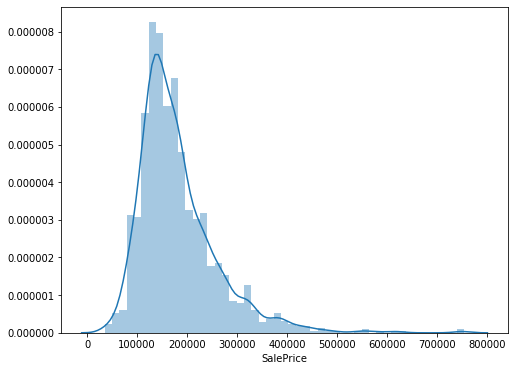

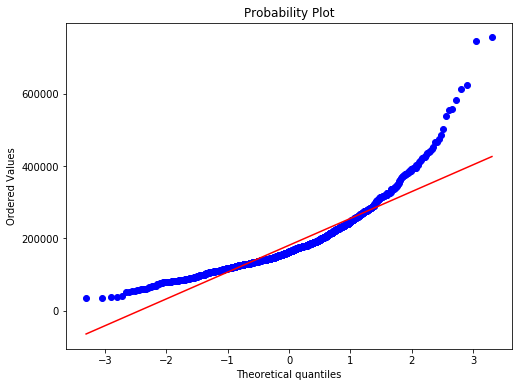

In [21]:
sns.distplot(train_data['SalePrice'])
fig = plt.figure()
res= stats.probplot(train_data['SalePrice'], plot=plt)

### Homoscedasticity 

- Between Sale Price and other numeric variable we must get a trending pattern (expecially after log transformations)

# Save for later use

In [22]:
#save data to file
#pd.to_pickle(train_data, 'data/train_data_cat_missing_binning_handled.pkl')
#pd.to_pickle(test_data, 'data/test_data_cat_missing_binning_handled.pkl')